In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
file_path = "/content/drive/My Drive/SAML-D.csv"
transaction_data = pd.read_csv(file_path)
transaction_data.head()

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
0,10:35:19,2022-10-07,8724731955,2769355426,1459.15,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits
1,10:35:20,2022-10-07,1491989064,8401255335,6019.64,UK pounds,Dirham,UK,UAE,Cross-border,0,Normal_Fan_Out
2,10:35:20,2022-10-07,287305149,4404767002,14328.44,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Small_Fan_Out
3,10:35:21,2022-10-07,5376652437,9600420220,11895.00,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In
4,10:35:21,2022-10-07,9614186178,3803336972,115.25,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits


In [42]:
transaction_data

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
0,10:35:19,2022-10-07,8724731955,2769355426,1459.15,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits
1,10:35:20,2022-10-07,1491989064,8401255335,6019.64,UK pounds,Dirham,UK,UAE,Cross-border,0,Normal_Fan_Out
2,10:35:20,2022-10-07,287305149,4404767002,14328.44,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Small_Fan_Out
3,10:35:21,2022-10-07,5376652437,9600420220,11895.00,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In
4,10:35:21,2022-10-07,9614186178,3803336972,115.25,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits
...,...,...,...,...,...,...,...,...,...,...,...,...
9504847,10:57:01,2023-08-23,2453933570,519744068,2247.25,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Small_Fan_Out
9504848,10:57:06,2023-08-23,9805510177,5416607878,927.18,UK pounds,UK pounds,UK,UK,Debit card,0,Normal_Small_Fan_Out
9504849,10:57:06,2023-08-23,7282330957,2995527149,1455.14,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Small_Fan_Out
9504850,10:57:11,2023-08-23,940337377,4812815165,25995.70,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In


In [43]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9504852 entries, 0 to 9504851
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Time                    object 
 1   Date                    object 
 2   Sender_account          int64  
 3   Receiver_account        int64  
 4   Amount                  float64
 5   Payment_currency        object 
 6   Received_currency       object 
 7   Sender_bank_location    object 
 8   Receiver_bank_location  object 
 9   Payment_type            object 
 10  Is_laundering           int64  
 11  Laundering_type         object 
dtypes: float64(1), int64(3), object(8)
memory usage: 870.2+ MB


In [44]:
# Setting up a nicer plotting style
sns.set_theme(style="whitegrid")

In [45]:
# check for missing values
missing_values = transaction_data.isnull().sum()
print("missing values : \n", missing_values)

missing values : 
 Time                      0
Date                      0
Sender_account            0
Receiver_account          0
Amount                    0
Payment_currency          0
Received_currency         0
Sender_bank_location      0
Receiver_bank_location    0
Payment_type              0
Is_laundering             0
Laundering_type           0
dtype: int64


In [46]:
# delet the rows with missing values
transaction_data = transaction_data.dropna()

In [47]:
# check for duplicate rows
duplicate_rows = transaction_data.duplicated().sum()
print("duplicate rows : \n", duplicate_rows)


duplicate rows : 
 0


In [48]:
# check negative or zero amount
negative_amount = (transaction_data['Amount'] <= 0).sum()
print("negative or zero amount : \n", negative_amount)

negative or zero amount : 
 0


In [49]:
# Transactions count by payment type
payment_type_counts = transaction_data['Payment_type'].value_counts()
print("Transactions count by payment type : \n", payment_type_counts)

Transactions count by payment type : 
 Payment_type
Credit card        2012909
Debit card         2012103
Cheque             2011419
ACH                2008807
Cross-border        933931
Cash Withdrawal     300477
Cash Deposit        225206
Name: count, dtype: int64


In [50]:
# transaction count by laundering type
laundering_type_counts = transaction_data['Laundering_type'].value_counts()
print("transaction count by laundering type : \n", laundering_type_counts)

transaction count by laundering type : 
 Laundering_type
Normal_Small_Fan_Out      3477717
Normal_Fan_Out            2302220
Normal_Fan_In             2104285
Normal_Group               528351
Normal_Cash_Withdrawal     305031
Normal_Cash_Deposits       223801
Normal_Periodical          210526
Normal_Plus_Mutual         155041
Normal_Mutual              125335
Normal_Foward               42031
Normal_single_large         20641
Structuring                  1870
Cash_Withdrawal              1334
Deposit-Send                  945
Smurfing                      932
Layered_Fan_In                656
Layered_Fan_Out               529
Stacked Bipartite             506
Behavioural_Change_1          394
Bipartite                     383
Cycle                         382
Fan_In                        364
Gather-Scatter                354
Behavioural_Change_2          345
Scatter-Gather                338
Single_large                  250
Fan_Out                       237
Over-Invoicing           

### Merge Date and Time Into A Single Datetime Column.

In [51]:
# Merge Date and Time Into A Single Datetime Column.
transaction_data['Datetime'] = pd.to_datetime(transaction_data['Date'] + ' ' + transaction_data['Time'])
transaction_data

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type,Datetime
0,10:35:19,2022-10-07,8724731955,2769355426,1459.15,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits,2022-10-07 10:35:19
1,10:35:20,2022-10-07,1491989064,8401255335,6019.64,UK pounds,Dirham,UK,UAE,Cross-border,0,Normal_Fan_Out,2022-10-07 10:35:20
2,10:35:20,2022-10-07,287305149,4404767002,14328.44,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Small_Fan_Out,2022-10-07 10:35:20
3,10:35:21,2022-10-07,5376652437,9600420220,11895.00,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In,2022-10-07 10:35:21
4,10:35:21,2022-10-07,9614186178,3803336972,115.25,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits,2022-10-07 10:35:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9504847,10:57:01,2023-08-23,2453933570,519744068,2247.25,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Small_Fan_Out,2023-08-23 10:57:01
9504848,10:57:06,2023-08-23,9805510177,5416607878,927.18,UK pounds,UK pounds,UK,UK,Debit card,0,Normal_Small_Fan_Out,2023-08-23 10:57:06
9504849,10:57:06,2023-08-23,7282330957,2995527149,1455.14,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Small_Fan_Out,2023-08-23 10:57:06
9504850,10:57:11,2023-08-23,940337377,4812815165,25995.70,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In,2023-08-23 10:57:11


# EDA

In [52]:
# count of transaction for sender bank location
sender_location_counts = transaction_data['Sender_bank_location'].value_counts()
print("count of transaction for sender bank location : \n", sender_location_counts)

count of transaction for sender bank location : 
 Sender_bank_location
UK             9183088
Turkey           20902
Switzerland      20503
Pakistan         20346
UAE              20081
Nigeria          20027
Spain            19391
Germany          19259
USA              19027
Italy            18895
France           18702
Japan            18468
Morocco          18437
Austria          18050
Mexico           17662
Albania          17648
India            17596
Netherlands      16770
Name: count, dtype: int64


In [53]:
#  count of transaction for reciever bank location
reciever_location_counts = transaction_data['Receiver_bank_location'].value_counts()
print("count of transaction for reciever bank location : \n", reciever_location_counts)

count of transaction for reciever bank location : 
 Receiver_bank_location
UK             8864634
Pakistan         38980
Austria          38844
Albania          38783
Japan            38729
Morocco          38704
Germany          38540
France           38512
Mexico           38385
Nigeria          38272
Netherlands      37314
Spain            37288
India            36936
USA              36850
Italy            36517
Switzerland      36081
UAE              35897
Turkey           35586
Name: count, dtype: int64


In [54]:
# Count of payement currency
payment_currency_counts = transaction_data['Payment_currency'].value_counts()
print("Count of payement currency : \n", payment_currency_counts)

Count of payement currency : 
 Payment_currency
UK pounds          9099293
Euro                117164
Turkish lira         27996
Swiss franc          27492
Dirham               27263
Pakistani rupee      27196
Naira                27143
US dollar            26061
Yen                  25562
Moroccan dirham      25395
Mexican Peso         24852
Albanian lek         24778
Indian rupee         24657
Name: count, dtype: int64


In [55]:
# Count of recieved currency
recieved_currency_counts = transaction_data['Received_currency'].value_counts()
print("Count of recieved currency : \n", recieved_currency_counts)

Count of recieved currency : 
 Received_currency
UK pounds          8783655
Euro                231911
Pakistani rupee      45993
Yen                  45814
Moroccan dirham      45748
Albanian lek         45736
Mexican Peso         45255
Naira                45046
Indian rupee         43757
US dollar            43664
Swiss franc          42931
Dirham               42797
Turkish lira         42545
Name: count, dtype: int64


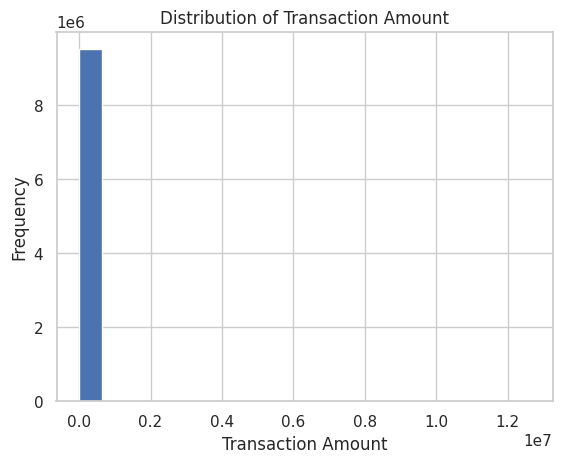

In [56]:
# visualize distribution of transaction amount
plt.hist(transaction_data['Amount'], bins=20)
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amount')
plt.show()

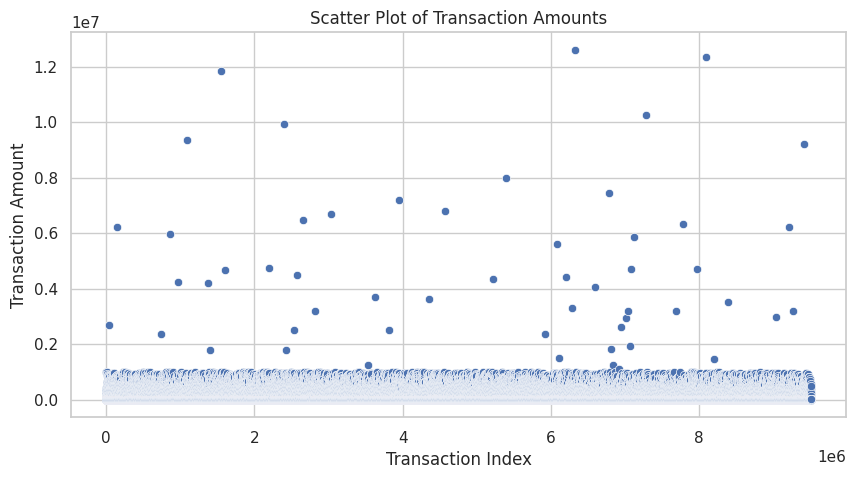

In [57]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=transaction_data.index, y= transaction_data ['Amount'])
plt.title("Scatter Plot of Transaction Amounts")
plt.xlabel("Transaction Index")
plt.ylabel("Transaction Amount")
plt.show()

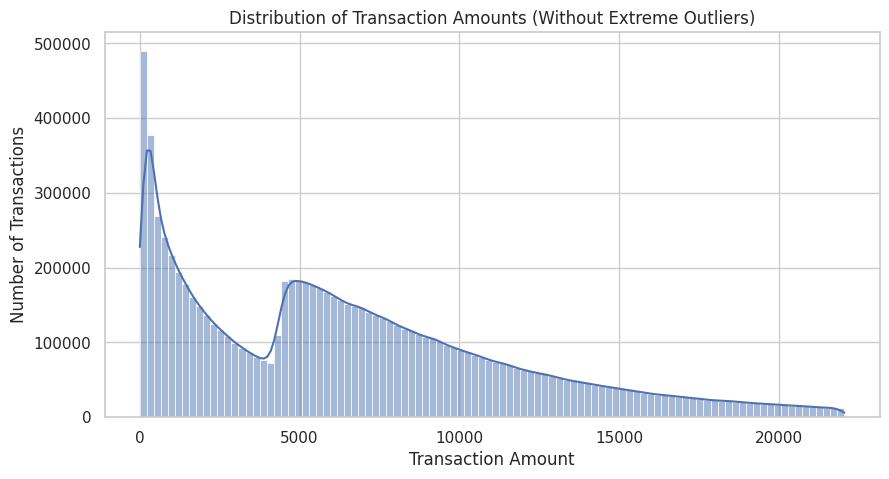

In [58]:
plt.figure(figsize=(10, 5))

# Define a threshold to exclude extreme outliers (e.g., 95th percentile)
x_max = transaction_data['Amount'].quantile(0.95)  # Focus on 95% of transactions

# Filter dataset to exclude transactions above x_max
filtered_data = transaction_data[transaction_data['Amount'] <= x_max]

# Plot histogram with filtered data
sns.histplot(filtered_data['Amount'], bins=100, kde=True)

# Labels and title
plt.title("Distribution of Transaction Amounts (Without Extreme Outliers)")
plt.xlabel("Transaction Amount")
plt.ylabel("Number of Transactions")

plt.show()

# Conclusion

### Most of the dots are low, but some are very high, it means those high ones are outliers, potentially suspicious transactions.

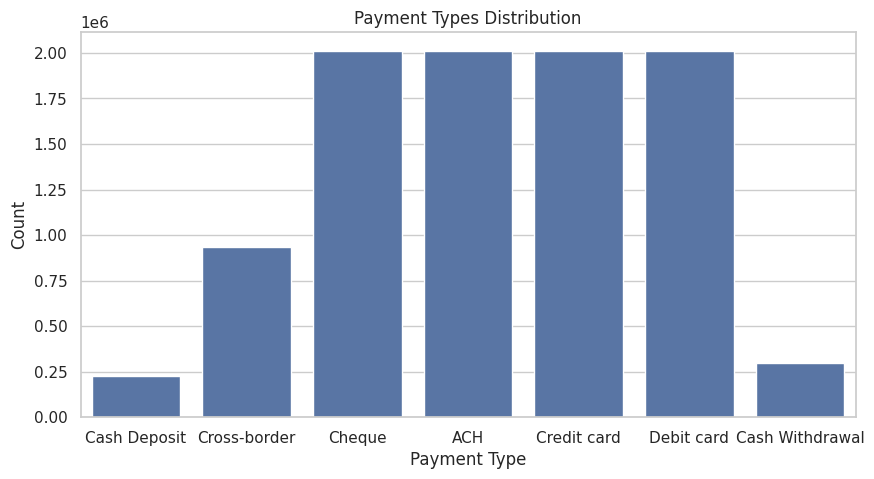

In [59]:
# payement types distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='Payment_type', data=transaction_data)
plt.title("Payment Types Distribution")
plt.xlabel("Payment Type")
plt.ylabel("Count")
plt.show()

# Conclusion

### The dominance of digital payment methods (cheques, ACH, credit, and debit cards) suggests that most transactions occur through formal banking channels rather than cash. However, cross-border transactions and cash transactions might be areas of interest for further analysis, as they could be associated with higher money laundering risks.

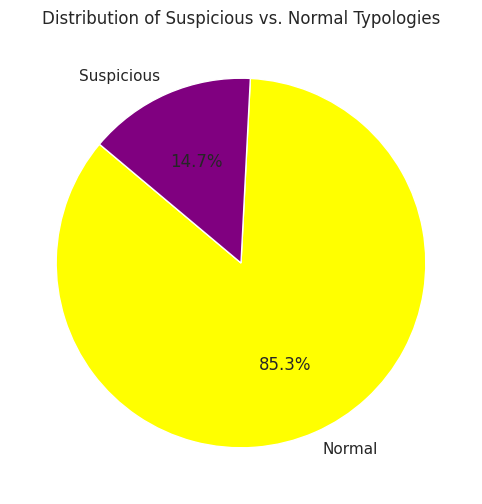

In [60]:
# Step 1: Define what is "normal" and what is "suspicious"
normal_typologies = ['Normal_Cash_Deposits', 'Normal_Fan_Out', 'Normal_Small_Fan_Out', 'Normal_Fan_In']
transaction_data['Typology_Category'] = transaction_data['Laundering_type'].apply(lambda x: 'Suspicious' if x not in normal_typologies else 'Normal')

# Step 2: Count occurrences
typology_category_counts = transaction_data['Typology_Category'].value_counts()

# Step 3: Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(typology_category_counts, labels=typology_category_counts.index, autopct='%1.1f%%', colors=['yellow', 'purple'], startangle=140)

# Add title
plt.title("Distribution of Suspicious vs. Normal Typologies")
plt.show()

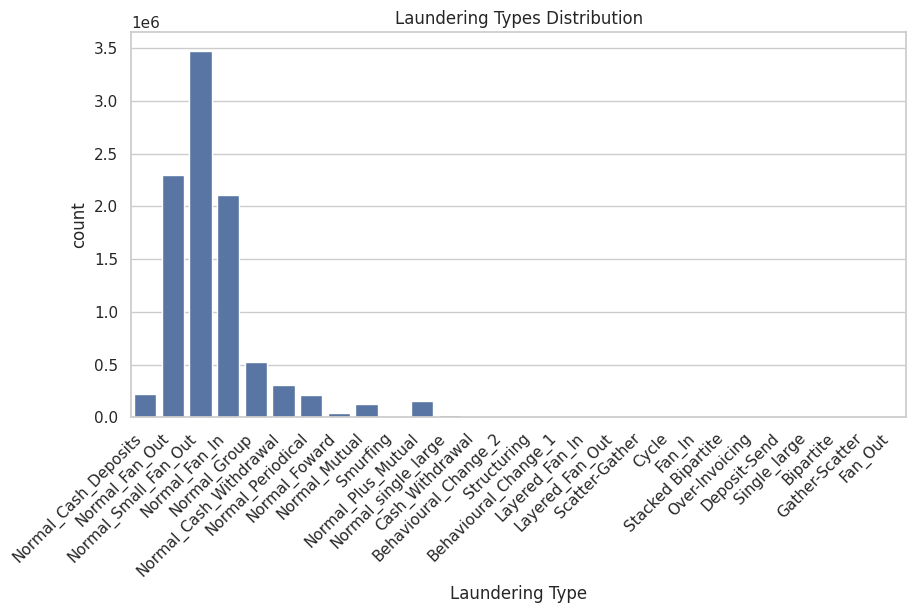

In [61]:
# Distribution of laundering type
plt.figure(figsize=(10, 5))
sns.countplot(x='Laundering_type', data=transaction_data)
plt.title("Laundering Types Distribution")
plt.xlabel("Laundering Type")
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-62-42c2b8c975d8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=laundering_data.index, y=laundering_data.values, palette="Reds")


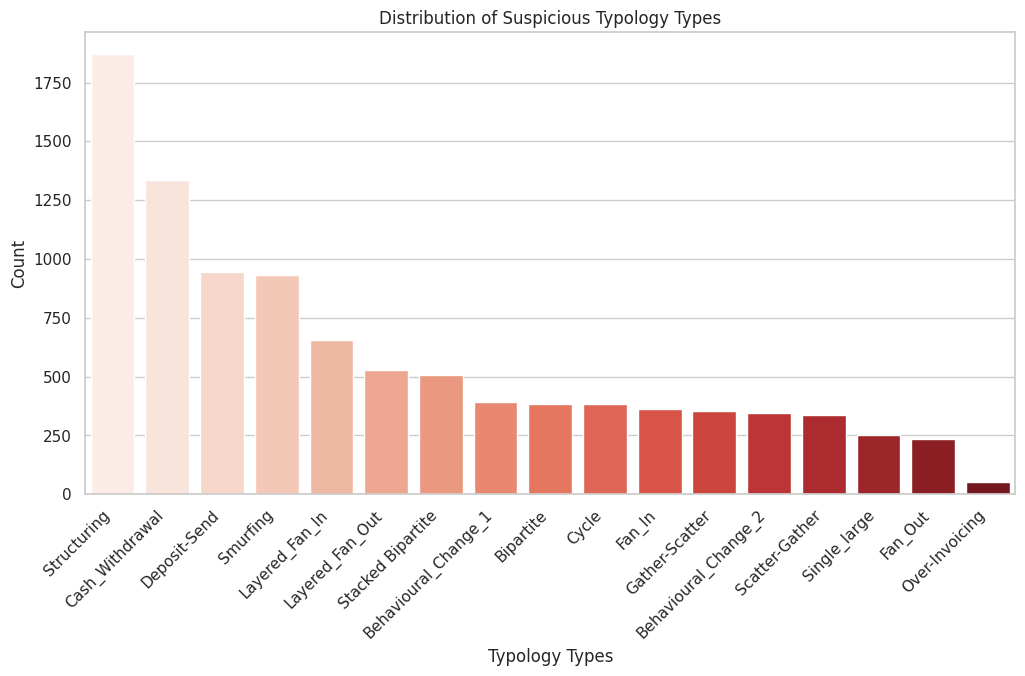

In [62]:
# Filter only suspicious typology types (Is_laundering = 1)
laundering_data = transaction_data[transaction_data['Is_laundering'] == 1]['Laundering_type'].value_counts()

# Set figure size
plt.figure(figsize=(12, 6))

# Create bar plot
sns.barplot(x=laundering_data.index, y=laundering_data.values, palette="Reds")

# Improve readability
plt.xticks(rotation=45, ha='right')
plt.title("Distribution of Suspicious Typology Types")
plt.xlabel("Typology Types")
plt.ylabel("Count")

# Show the bar chart
plt.show()

# This code analyzes laundering activities by sender location, calculating the percentage of fraudulent transactions to identify high-risk areas for fraud detection.

In [63]:
# Replace these with actual column names in your dataset
sender_col = "Sender_bank_location"  # Example, update based on your dataset
laundering_type_col = "Laundering_type"  # Example, update based on your dataset
laundering_flag_col = "Is_laundering"  # Example, update based on your dataset (should be 0 or 1)

# Ensure the laundering flag is binary (1 = laundering transaction)
transaction_data[laundering_flag_col] = transaction_data[laundering_flag_col].astype(int)

# Filter only laundering transactions
laundering_transaction_data = transaction_data[transaction_data[laundering_flag_col] == 1]

# Group by sender location and laundering type
laundering_counts = laundering_transaction_data.groupby([sender_col, laundering_type_col]).size().reset_index(name="Count")

# Total transactions per sender location
total_transactions = transaction_data.groupby(sender_col).size().reset_index(name="Total_Transactions")

# Merge with total transactions
laundering_percentage = laundering_counts.merge(total_transactions, on=sender_col)
laundering_percentage["Laundering_Percentage"] = (laundering_percentage["Count"] / laundering_percentage["Total_Transactions"])*100

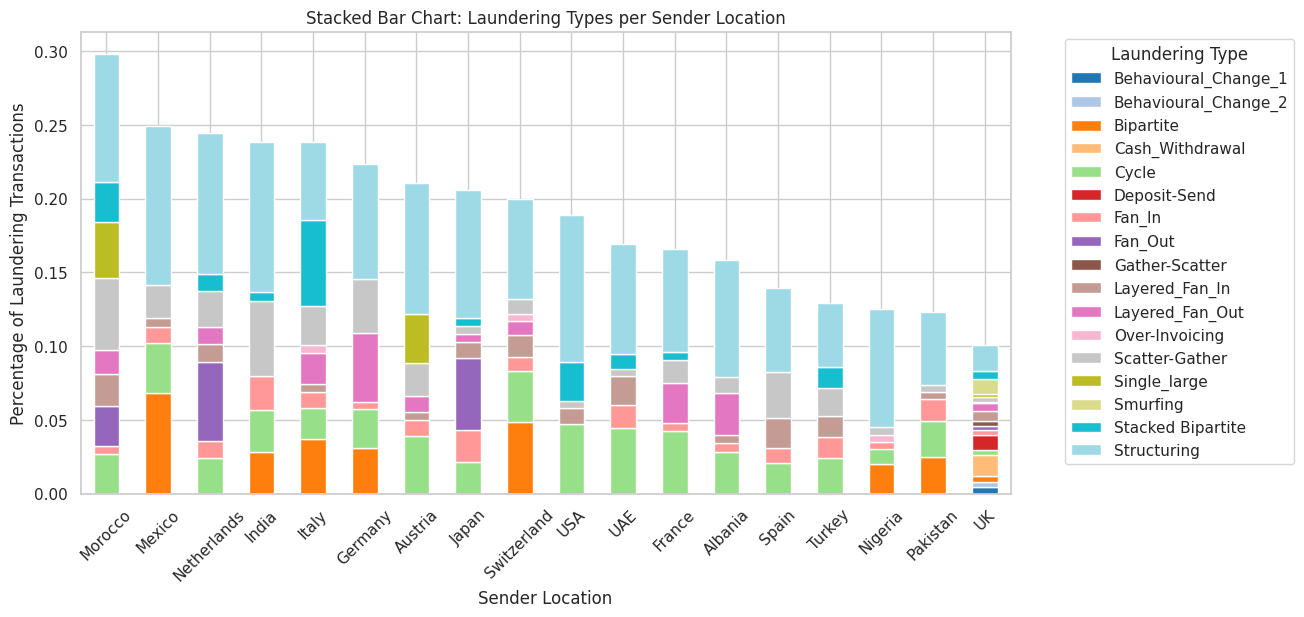

In [64]:
# Pivot data for a stacked bar plot
pivot_data = laundering_percentage.pivot(index=sender_col, columns=laundering_type_col, values="Laundering_Percentage")

# Sort locations by total laundering percentage
pivot_data["Total"] = pivot_data.sum(axis=1)
pivot_data = pivot_data.sort_values(by="Total", ascending=False).drop(columns=["Total"])

# Plot the stacked bar chart
pivot_data.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="tab20")

plt.xlabel("Sender Location")
plt.ylabel("Percentage of Laundering Transactions")
plt.title("Stacked Bar Chart: Laundering Types per Sender Location")
plt.xticks(rotation=45)
plt.legend(title="Laundering Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

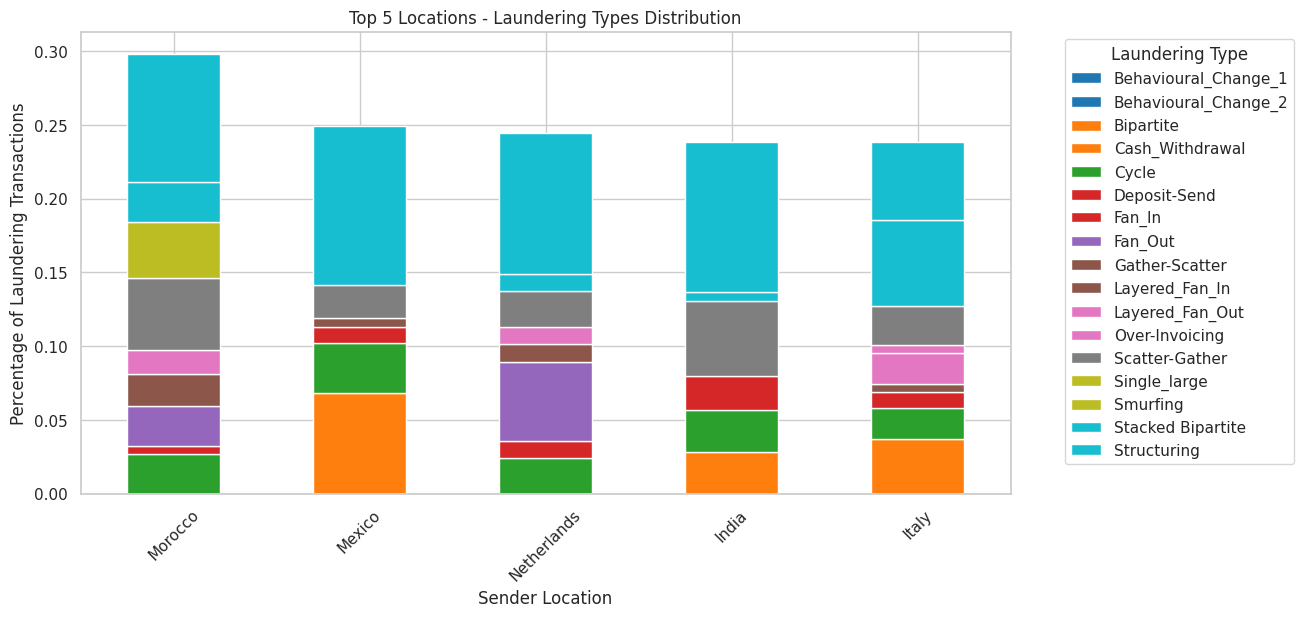

In [65]:
top_locations = pivot_data.sum(axis=1).nlargest(5).index
pivot_top = pivot_data.loc[top_locations]

# Plot again
pivot_top.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="tab10")

plt.xlabel("Sender Location")
plt.ylabel("Percentage of Laundering Transactions")
plt.title("Top 5 Locations - Laundering Types Distribution")
plt.xticks(rotation=45)
plt.legend(title="Laundering Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

# This code analyzes laundering activities by receiver location, calculating the percentage of fraudulent transactions to identify high-risk areas for fraud detection.



In [66]:
# Replace these with actual column names in your dataset
sender_col = "Receiver_bank_location"  # Example, update based on your dataset
laundering_type_col = "Laundering_type"  # Example, update based on your dataset
laundering_flag_col = "Is_laundering"  # Example, update based on your dataset (should be 0 or 1)

# Ensure the laundering flag is binary (1 = laundering transaction)
transaction_data[laundering_flag_col] = transaction_data[laundering_flag_col].astype(int)

# Filter only laundering transactions
laundering_transaction_data = transaction_data[transaction_data[laundering_flag_col] == 1]

# Group by sender location and laundering type
laundering_counts = laundering_transaction_data.groupby([sender_col, laundering_type_col]).size().reset_index(name="Count")

# Total transactions per sender location
total_transactions = transaction_data.groupby(sender_col).size().reset_index(name="Total_Transactions")

# Merge with total transactions
laundering_percentage = laundering_counts.merge(total_transactions, on=sender_col)
laundering_percentage["Laundering_Percentage"] = (laundering_percentage["Count"] / laundering_percentage["Total_Transactions"])*100

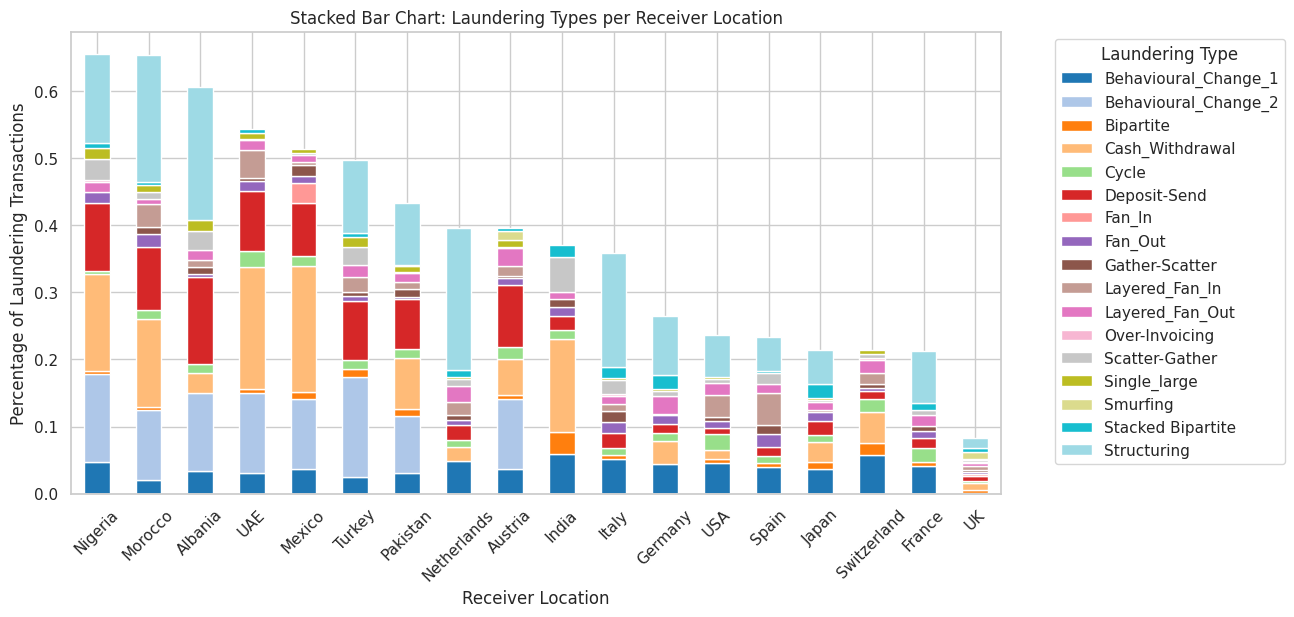

In [67]:
# Pivot data for a stacked bar plot
pivot_data = laundering_percentage.pivot(index=sender_col, columns=laundering_type_col, values="Laundering_Percentage")

# Sort locations by total laundering percentage
pivot_data["Total"] = pivot_data.sum(axis=1)
pivot_data = pivot_data.sort_values(by="Total", ascending=False).drop(columns=["Total"])

# Plot the stacked bar chart
pivot_data.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="tab20")

plt.xlabel("Receiver Location")
plt.ylabel("Percentage of Laundering Transactions")
plt.title("Stacked Bar Chart: Laundering Types per Receiver Location")
plt.xticks(rotation=45)
plt.legend(title="Laundering Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

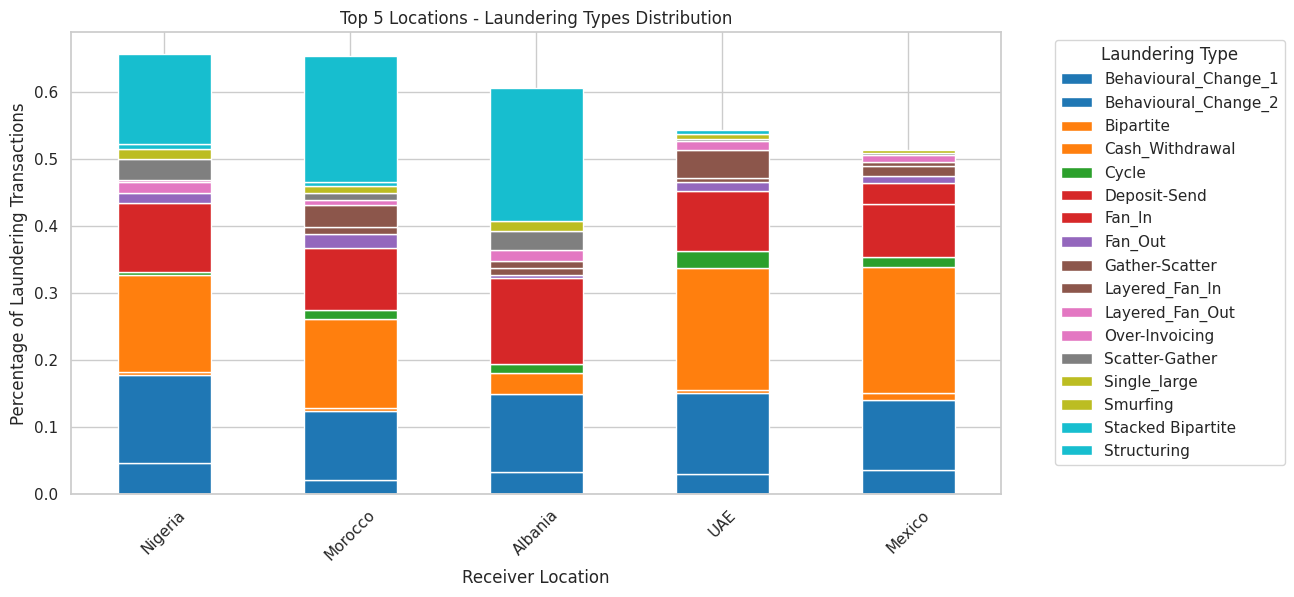

In [68]:
top_locations = pivot_data.sum(axis=1).nlargest(5).index
pivot_top = pivot_data.loc[top_locations]

# Plot again
pivot_top.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="tab10")

plt.xlabel("Receiver Location")
plt.ylabel("Percentage of Laundering Transactions")
plt.title("Top 5 Locations - Laundering Types Distribution")
plt.xticks(rotation=45)
plt.legend(title="Laundering Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

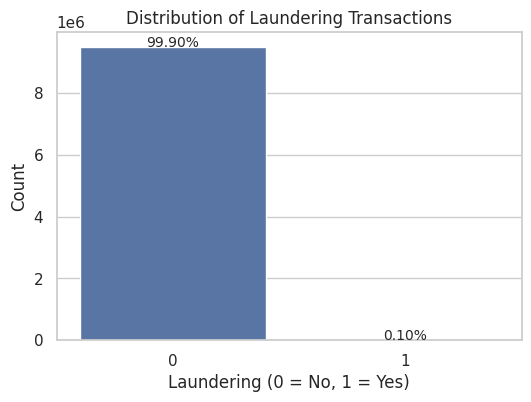

In [69]:
# Is laundering or not?
plt.figure(figsize=(6, 4))
sns.countplot(x='Is_laundering', data=transaction_data)

# Add labels and title
plt.title("Distribution of Laundering Transactions")
plt.xlabel("Laundering (0 = No, 1 = Yes)")
plt.ylabel("Count")

# Show percentage labels on the bars
total = len(transaction_data)
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width()/2, height + 100,
             f'{(height/total)*100:.2f}%',
             ha='center', fontsize=10)
plt.show()

In [70]:
# count of is laundering
is_laundering_counts = transaction_data['Is_laundering'].value_counts()
print("count of is laundering : \n", is_laundering_counts)

count of is laundering : 
 Is_laundering
0    9494979
1       9873
Name: count, dtype: int64


In [71]:
# Cross-tab Payment Type vs. Is_laundering
if 'Payment_type' in transaction_data.columns and 'Is_laundering' in transaction_data.columns:
    cross_tab = pd.crosstab(transaction_data['Payment_type'], transaction_data['Is_laundering'])

    # Compute total laundering cases (sum of column 1.0)
    total_laundering_cases = cross_tab[1.0].sum()

    # Modify the table directly: Percentage of laundering cases within total laundering cases
    cross_tab[1.0] = cross_tab[1.0].astype(str) + " (" + (cross_tab[1.0].astype(int) / total_laundering_cases * 100).round(2).astype(str) + "%)"

    # Print and display results
    print("\nPayment Type vs. Laundering Cross-Tab (Percentage of Each Laundering Type from Total Laundering Cases):")
    display(cross_tab)



Payment Type vs. Laundering Cross-Tab (Percentage of Each Laundering Type from Total Laundering Cases):


Is_laundering,0,1
Payment_type,,
ACH,2007648,1159 (11.74%)
Cash Deposit,223801,1405 (14.23%)
Cash Withdrawal,299143,1334 (13.51%)
Cheque,2010332,1087 (11.01%)
Credit card,2011773,1136 (11.51%)
Cross-border,931303,2628 (26.62%)
Debit card,2010979,1124 (11.38%)


# Correlation

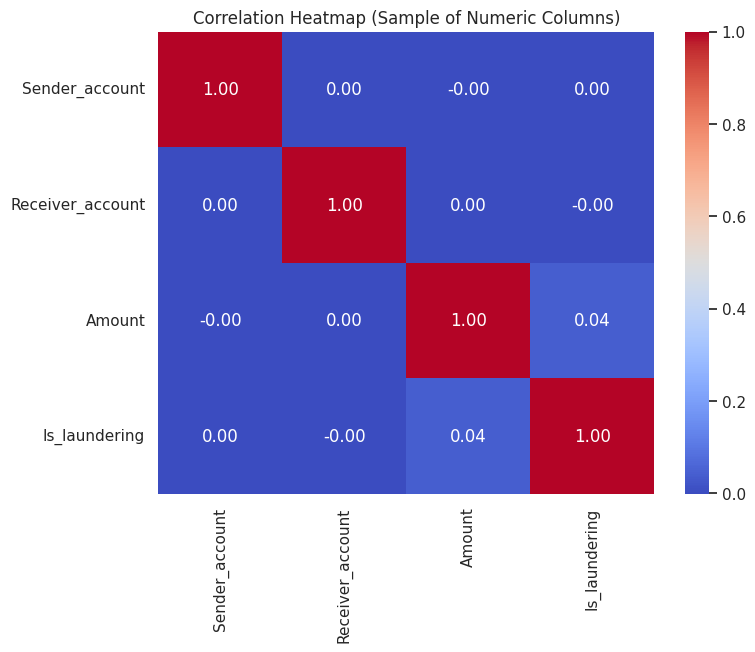

In [72]:
# Correlation heatmap for numeric features
numeric_cols = transaction_data.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(8, 6))
corr = transaction_data[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Sample of Numeric Columns)")
plt.show()

# Result:


#### No strong correlation exists between transaction amount and laundering. Sender and receiver accounts are independent. A weak relationship (0.04) suggests that transaction amount alone is not a strong indicator of laundering, so other factors (like transaction frequency, location, etc.) may be needed for better predictions.

# Feature engineering

In [73]:
# Ensure 'Date' column is in datetime format
transaction_data['Date'] = pd.to_datetime(transaction_data['Date'])

# Extract the "year" column
transaction_data['year'] = transaction_data['Date'].dt.year

# Extract the "month" column
transaction_data['month'] = transaction_data['Date'].dt.month

# Extract the "Year-Month" column
transaction_data['Year-Month'] = transaction_data['Date'].dt.to_period('M')

# Extract "Is_weekend" column (1 if weekend, 0 otherwise)
transaction_data['Is_weekend'] = transaction_data['Date'].dt.dayofweek.apply(lambda x: 1 if x >= 5 else 0)

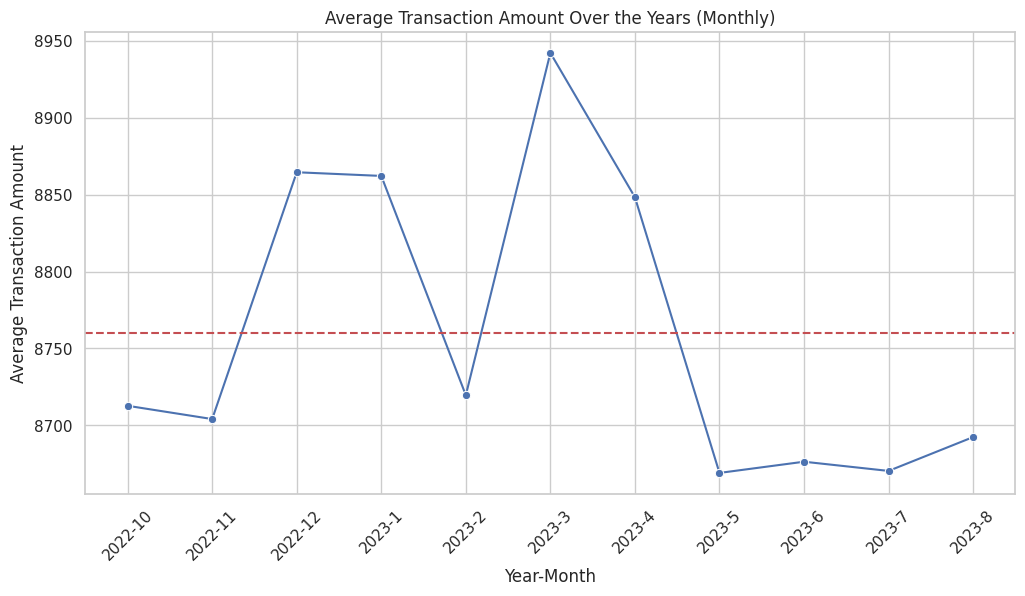

In [74]:
# Group by Year and Month, then calculate the average transaction amount
monthly_avg = transaction_data.groupby(['year', 'month'])['Amount'].mean().reset_index()

# Create a Month-Year column for better visualization
monthly_avg['Year-Month'] = monthly_avg['year'].astype(str) + '-' + monthly_avg['month'].astype(str)

# Calculate the overall average transaction amount
overall_avg = monthly_avg['Amount'].mean()

# Plot the trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg, x='Year-Month', y='Amount', marker='o')

# Add a horizontal line for the overall average transaction amount
plt.axhline(y=overall_avg, color='r', linestyle='--', label=f'Overall Avg: {overall_avg:.2f}')

# Improve readability
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.title("Average Transaction Amount Over the Years (Monthly)")
plt.xlabel("Year-Month")
plt.ylabel("Average Transaction Amount")

plt.show()

# Conclusion

### The average transaction amount shows significant fluctuations, peaking in early 2023 before sharply declining and stabilizing mid-year. A slight recovery appears in August 2023, suggesting possible seasonality or external influences.


<ipython-input-75-f4bb62bd5c89>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_alerted_accounts, x='Sender_account', y='Alert_Count', palette="Reds_r")


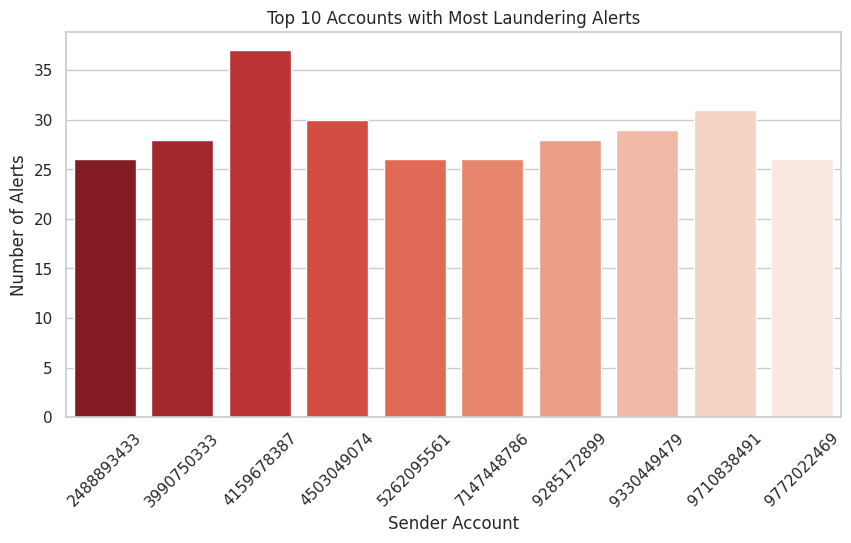

In [75]:
# Filter accounts involved in laundering (Is_laundering == 1)
alerted_accounts = transaction_data[transaction_data['Is_laundering'] == 1]

# Count the number of times each account was flagged
account_alert_counts = alerted_accounts['Sender_account'].value_counts().reset_index()
account_alert_counts.columns = ['Sender_account', 'Alert_Count']

# Select the top 10 accounts with the highest number of alerts
top_alerted_accounts = account_alert_counts.head(10)

# Plot the top alerted accounts
plt.figure(figsize=(10, 5))
sns.barplot(data=top_alerted_accounts, x='Sender_account', y='Alert_Count', palette="Reds_r")

# Add labels and title
plt.title("Top 10 Accounts with Most Laundering Alerts")
plt.xlabel("Sender Account")
plt.ylabel("Number of Alerts")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

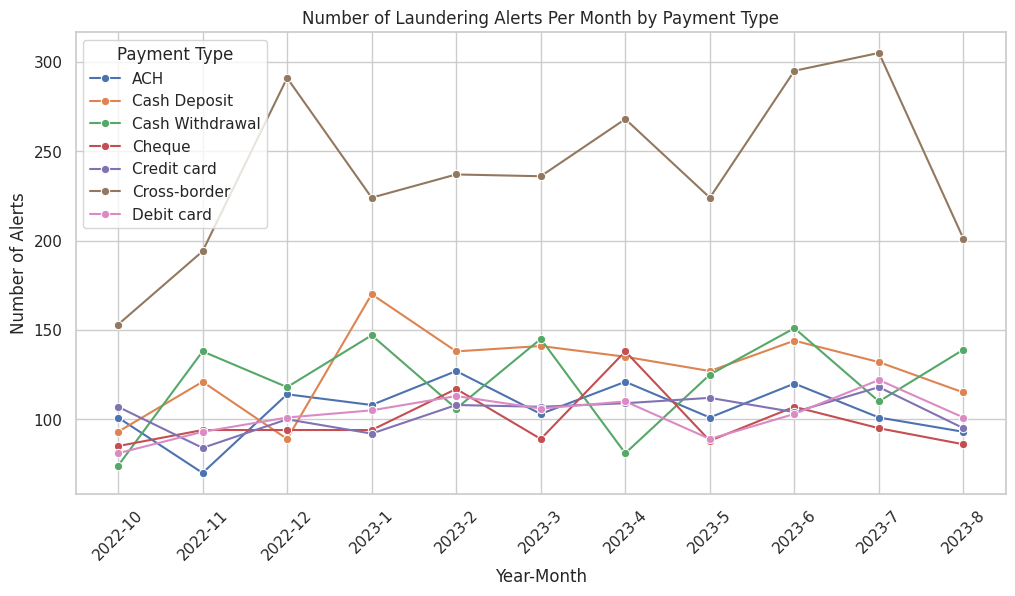

In [76]:
# Step 3: Filter only laundering alerts (Is_laundering == 1)
laundering_alerts = transaction_data[transaction_data['Is_laundering'] == 1]

# Step 4: Count alerts per month split by payment type
alerts_per_month = laundering_alerts.groupby(['year', 'month', 'Payment_type']).size().reset_index(name='Alert_Count')

# Step 5: Create a combined "Year-Month" column for better visualization
alerts_per_month['Year-Month'] = alerts_per_month['year'].astype(str) + '-' + alerts_per_month['month'].astype(str)

# Step 6: Plot the number of alerts per month, split by payment type
plt.figure(figsize=(12, 6))
sns.lineplot(data=alerts_per_month, x='Year-Month', y='Alert_Count', hue='Payment_type', marker='o')

# Improve readability
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.title("Number of Laundering Alerts Per Month by Payment Type")
plt.xlabel("Year-Month")
plt.ylabel("Number of Alerts")
plt.legend(title="Payment Type")

plt.show()


# Conclusion:

### Cash-related transactions appear to have the highest risk of laundering, while digital payment methods show fewer fluctuations. Further investigation into peak months might reveal patterns in laundering activities.

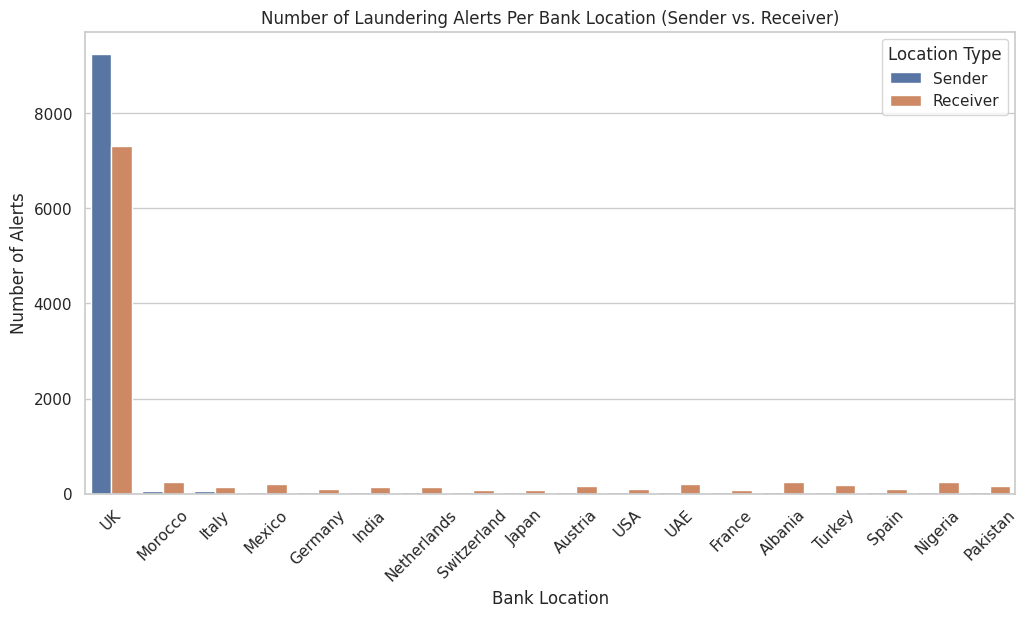

In [77]:
# Filter only laundering alerts (Is_laundering == 1)
laundering_alerts = transaction_data[transaction_data['Is_laundering'] == 1]

# Step 2: Count alerts per sender bank location
sender_alerts = laundering_alerts['Sender_bank_location'].value_counts().reset_index()
sender_alerts.columns = ['Bank Location', 'Alert_Count']
sender_alerts['Type'] = 'Sender'

# Step 3: Count alerts per receiver bank location
receiver_alerts = laundering_alerts['Receiver_bank_location'].value_counts().reset_index()
receiver_alerts.columns = ['Bank Location', 'Alert_Count']
receiver_alerts['Type'] = 'Receiver'

# Step 4: Combine sender and receiver alerts into one DataFrame
alerts_per_location = pd.concat([sender_alerts, receiver_alerts])

# Step 5: Plot the number of alerts per bank location
plt.figure(figsize=(12, 6))
sns.barplot(data=alerts_per_location, x='Bank Location', y='Alert_Count', hue='Type')

# Improve readability
plt.title("Number of Laundering Alerts Per Bank Location (Sender vs. Receiver)")
plt.xlabel("Bank Location")
plt.ylabel("Number of Alerts")
plt.xticks(rotation=45)
plt.legend(title="Location Type")

plt.show()


Create a new dataframe to use it later for laundering analysis

In [78]:
# Filter only transactions flagged as laundering (Is_laundering == 1)
laundering_data = transaction_data[transaction_data['Is_laundering'] == 1]

# Display the first few rows to confirm
print(laundering_data.head())

          Time       Date  Sender_account  Receiver_account   Amount  \
317   10:46:37 2022-10-07      7401327478        4336451277  2603.30   
1206  11:19:32 2022-10-07      6340007440        4316483340   106.04   
1649  11:35:42 2022-10-07      3758118046        6081504025  5903.33   
1954  11:45:53 2022-10-07       445154846        4497771501  3957.87   
3304  12:39:03 2022-10-07      2758469152        2987279234  7832.41   

     Payment_currency Received_currency Sender_bank_location  \
317         UK pounds         UK pounds                   UK   
1206        UK pounds      Indian rupee                   UK   
1649        UK pounds      Mexican Peso                   UK   
1954        UK pounds             Naira                   UK   
3304        UK pounds         UK pounds                   UK   

     Receiver_bank_location     Payment_type  Is_laundering  \
317                      UK     Cash Deposit              1   
1206                  India  Cash Withdrawal            